# Nama Kelompok : 


1.   Hairul Yasin          F55121011
2.   Wahid Radikal Akhlak  F55121022

---
Masing-masing memilih 10 sampel citra

Lakukan ektraksi HSV

Lakukan perhitungan statistik seperti Mean, Standar Deviasi, Variance, Modus, Skewness.

Berikan kesimpulan (insight) mengenai perbedaan setiap  citra menggunakan parameter metric statistik yang digunakan






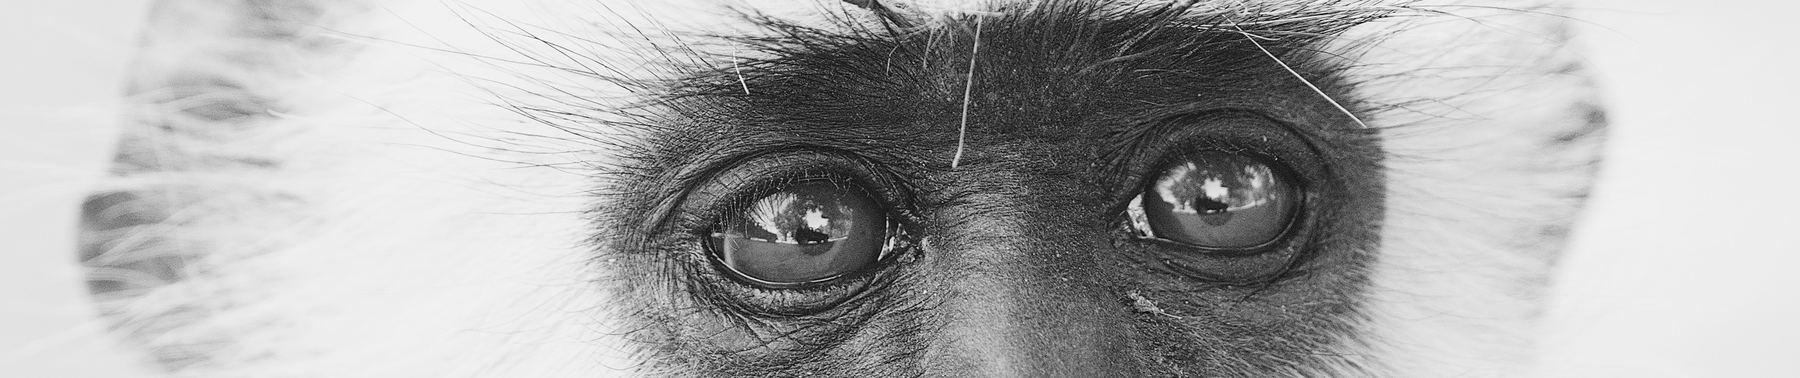

**Disini kami menggunakan 10 sampel citra dari Kagle yaitu '10 Monkey Species'. Citra-citra dalam dataset ini memiliki ukuran 400x300 citra atau lebih besar dengan format JPG.**
[**Link Dataset :**](https://www.kaggle.com/datasets/slothkong/10-monkey-species)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import mode, skew


In [2]:
# Buat list nama file citra
file_names = ["gambar0.jpg", "gambar1.jpg", "gambar2.jpg", "gambar3.jpg", "gambar4.jpg",
              "gambar5.jpg", "gambar6.jpg", "gambar7.jpg", "gambar8.jpg", "gambar9.jpg"]

# Inisialisasi list untuk menyimpan citra dan nilai HSV-nya
images = []
hsv_values = []

# Loop melalui setiap nama file citra pada list
for file_name in file_names:
    # Baca citra dari file
    img = cv2.imread(file_name)
    # Resize citra ke ukuran yang sama
    img = cv2.resize(img, (200, 200))
    # Ubah format citra dari BGR ke HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Tambahkan citra dan nilai HSV-nya ke dalam list
    images.append(hsv)
    hsv_values.append(hsv)


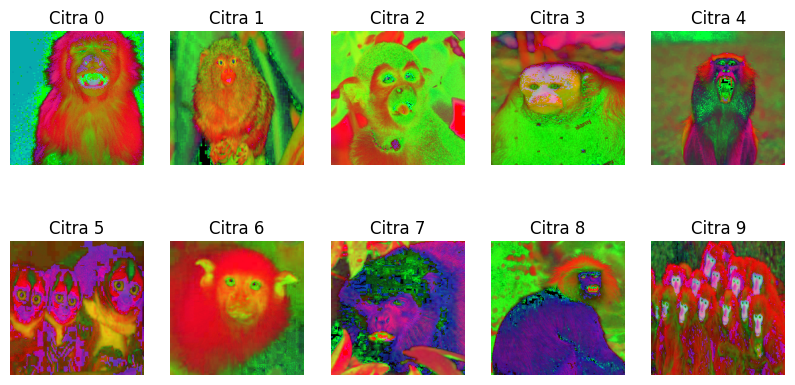

In [3]:
# Menampilkan setiap citra dalam grid 2x5
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.flatten()
for i in range(len(images)):
    # Tampilkan citra
    axs[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'Citra {i}')
    axs[i].axis('off')
plt.show()


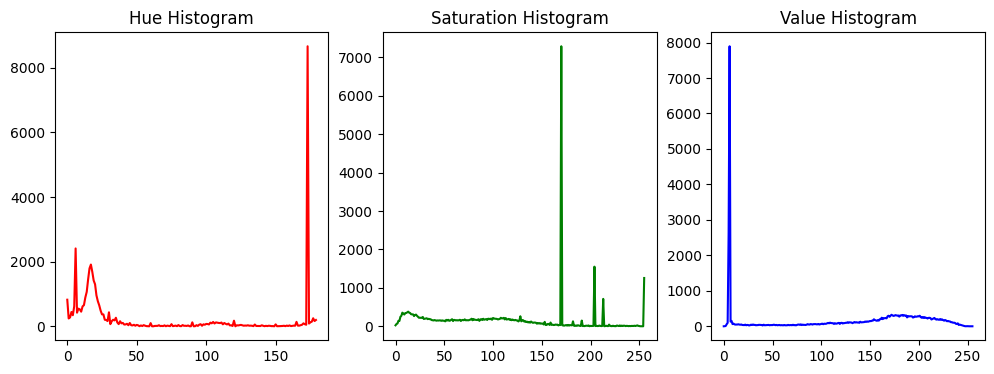

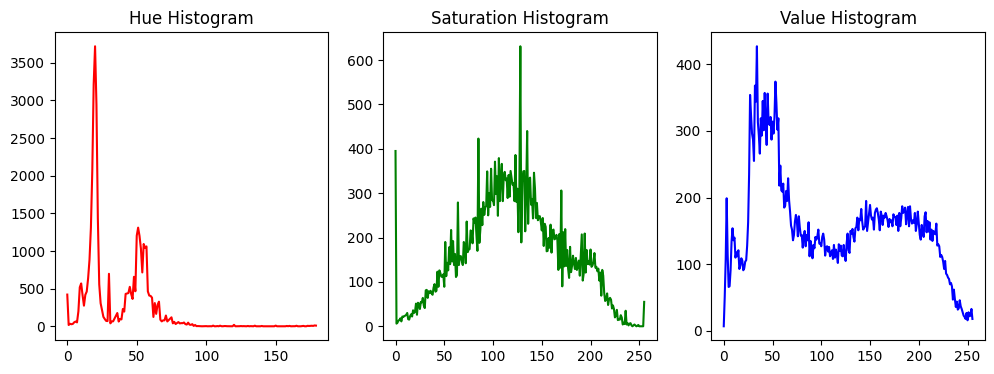

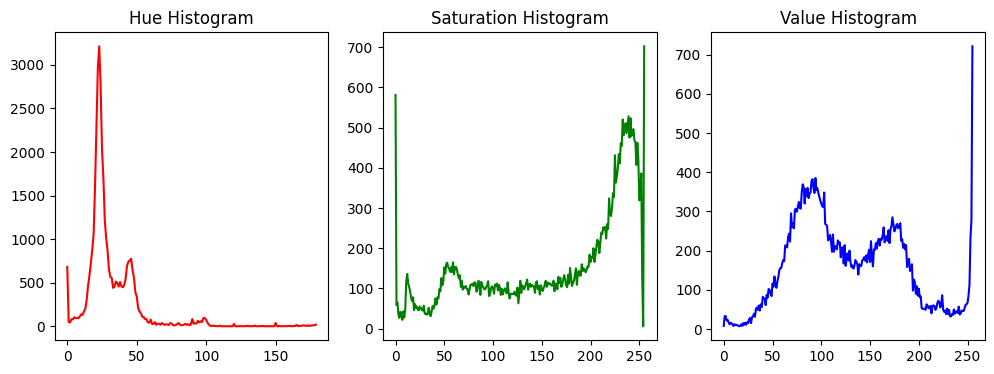

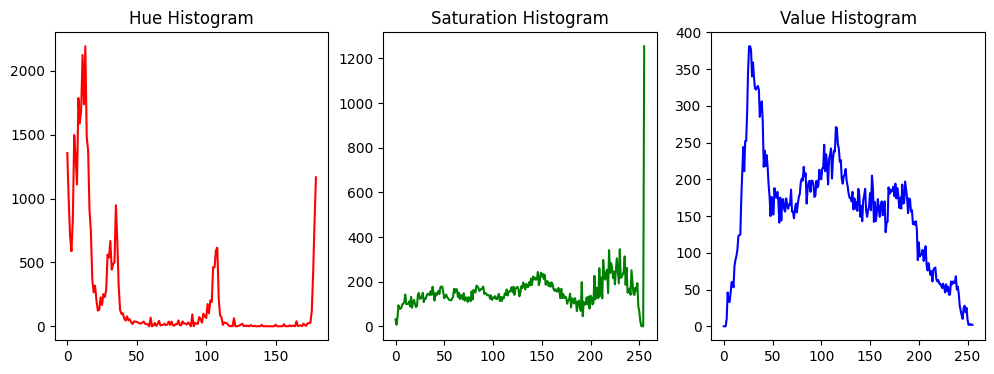

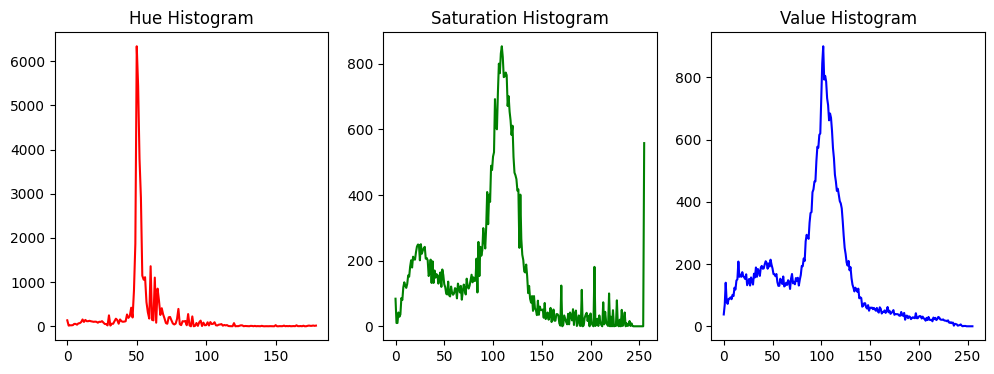

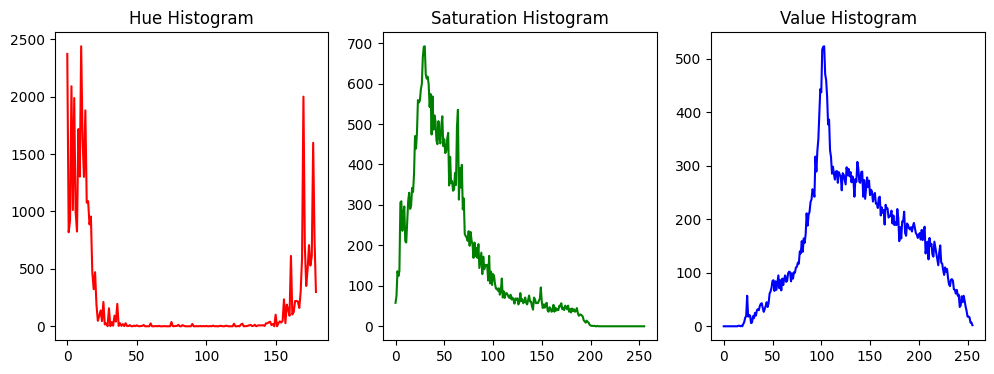

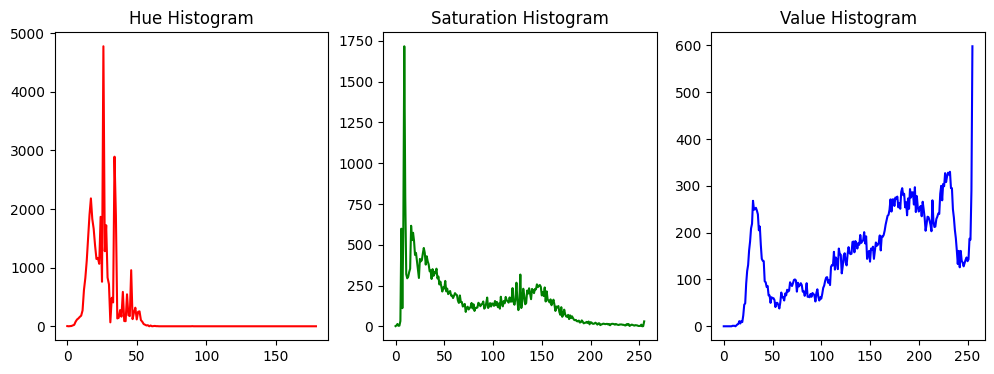

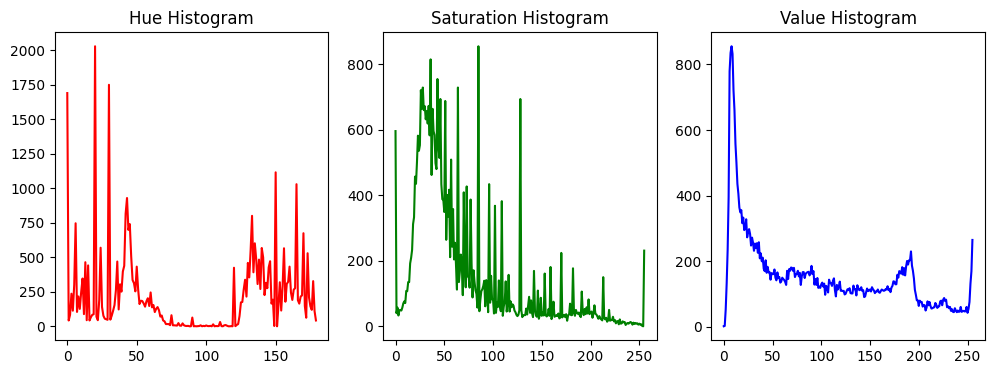

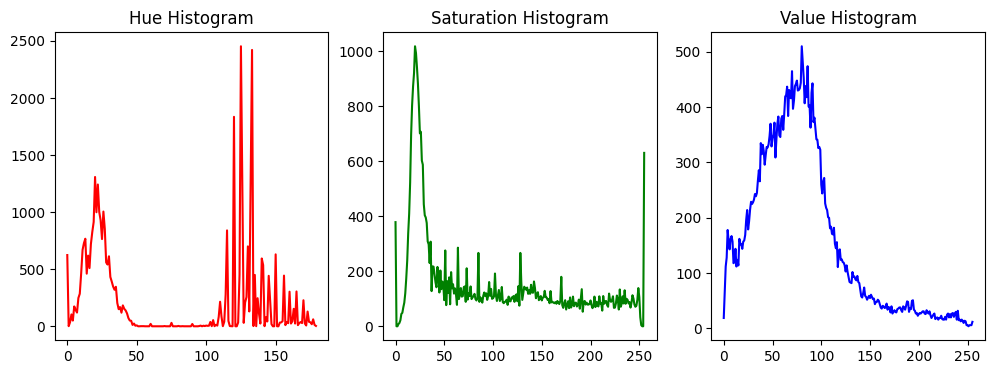

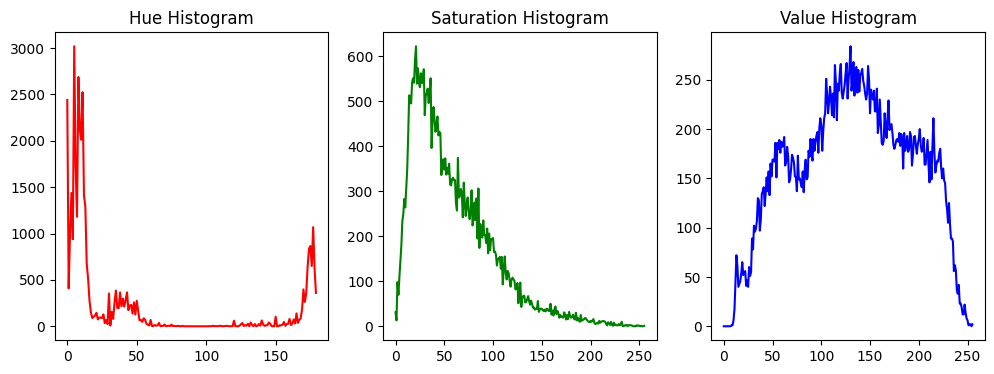

In [4]:
# Loop melalui setiap citra dalam list images
for i in range(len(images)):
    # Hitung histogram untuk masing-masing channel warna HSV
    h_hist = cv2.calcHist([hsv_values[i]], [0], None, [180], [0, 180])
    s_hist = cv2.calcHist([hsv_values[i]], [1], None, [256], [0, 256])
    v_hist = cv2.calcHist([hsv_values[i]], [2], None, [256], [0, 256])
    
    # Tampilkan histogram menggunakan plot
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    ax[0].plot(h_hist, color='r')
    ax[0].set_title('Hue Histogram')
    ax[1].plot(s_hist, color='g')
    ax[1].set_title('Saturation Histogram')
    ax[2].plot(v_hist, color='b')
    ax[2].set_title('Value Histogram')
    plt.show()


In [5]:
# Buat array 2 dimensi untuk setiap nilai statistik
means = np.zeros((len(file_names), 3))
stds = np.zeros((len(file_names), 3))
vars = np.zeros((len(file_names), 3))
modes = np.zeros((len(file_names), 3))
skews = np.zeros((len(file_names), 3))

# Loop melalui setiap citra dan hitung nilai statistik untuk setiap komponen HSV
for i, hsv in enumerate(hsv_values):
    h, s, v = cv2.split(hsv)
    means[i] = [np.mean(h), np.mean(s), np.mean(v)]
    stds[i] = [np.std(h), np.std(s), np.std(v)]
    vars[i] = [np.var(h), np.var(s), np.var(v)]
    h_mode = mode(h.ravel())[0][0]
    s_mode = mode(s.ravel())[0][0]
    v_mode = mode(v.ravel())[0][0]
    modes[i] = [h_mode, s_mode, v_mode]
    h_skew = skew(h.ravel())
    s_skew = skew(s.ravel())
    v_skew = skew(v.ravel())
    skews[i] = [h_skew, s_skew, v_skew]

# Tampilkan hasil
print("Means:")
print(means)
print("Stds:")
print(stds)
print("Vars:")
print(vars)
print("Modes:")
print(modes)
print("Skews:")
print(skews)


Means:
[[ 63.816825 105.587225 120.424175]
 [ 34.71825  121.30205  110.7274  ]
 [ 30.694725 167.25975  128.408125]
 [ 35.893375 139.979    107.51035 ]
 [ 54.390475  96.52325   93.0215  ]
 [ 57.288925  57.335325 138.7997  ]
 [ 25.833375  75.23115  159.518975]
 [ 85.946125  67.243625  92.312325]
 [ 72.7315    90.628325  78.91425 ]
 [ 43.466125  58.175875 132.467225]]
Stds:
[[69.10661851 68.35999336 83.75100806]
 [20.43523959 49.50303037 67.95206428]
 [18.63959045 75.43416686 55.70692963]
 [48.3925031  72.64343714 61.69296105]
 [18.33856467 47.00282874 42.86630189]
 [73.41550856 40.44952697 48.66875466]
 [ 9.92625111 56.92123391 65.68927036]
 [60.95457179 52.14449321 73.76283026]
 [56.74823176 75.27086776 45.8668769 ]
 [62.82609094 40.82144893 57.15239475]]
Vars:
[[4775.72472192 4673.0886918  7014.23135057]
 [ 417.59901694 2450.5500158  4617.48303924]
 [ 347.43433217 5690.31352994 3103.26200898]
 [2341.83435611 5277.068959   3806.02144288]
 [ 336.30295427 2209.26590944 1837.51983775]
 [53

<ipython-input-5-b63d9a7beb5f>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  h_mode = mode(h.ravel())[0][0]
<ipython-input-5-b63d9a7beb5f>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  s_mode = mode(s.ravel())[0][0]
<ipython-input-5-b63d9a7beb5f>:16: Futur

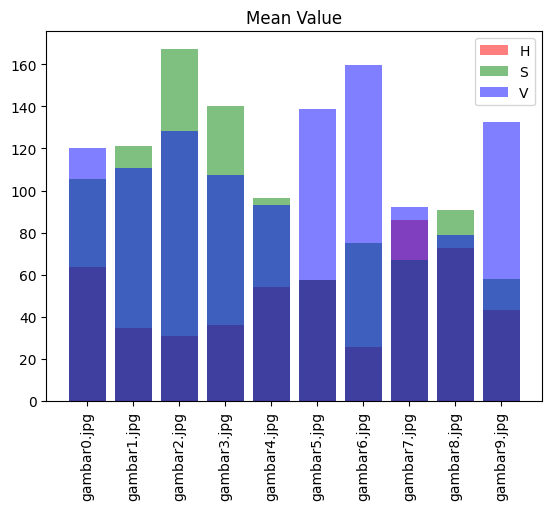

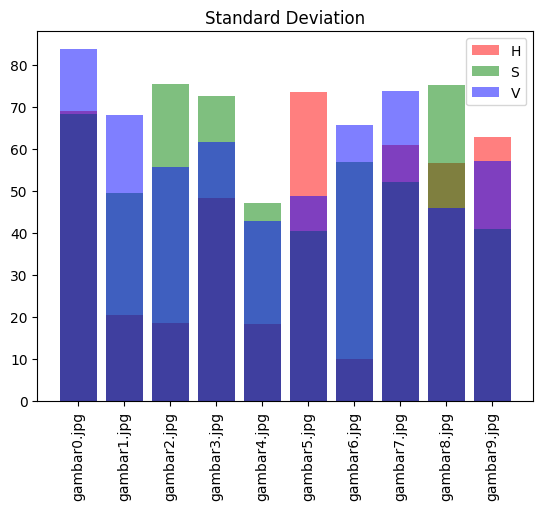

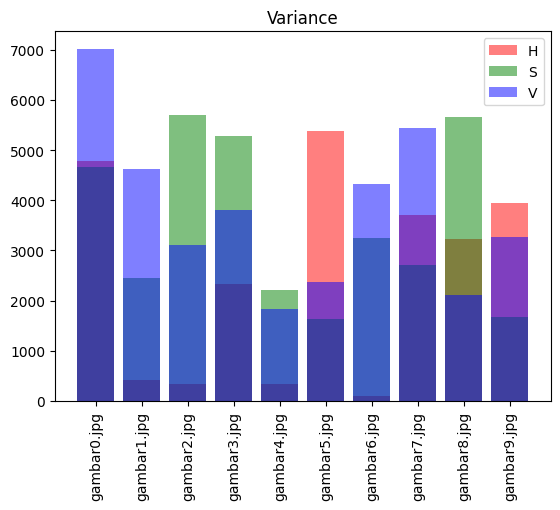

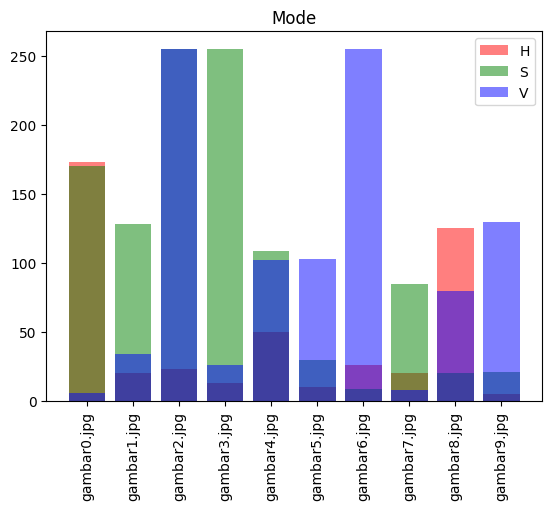

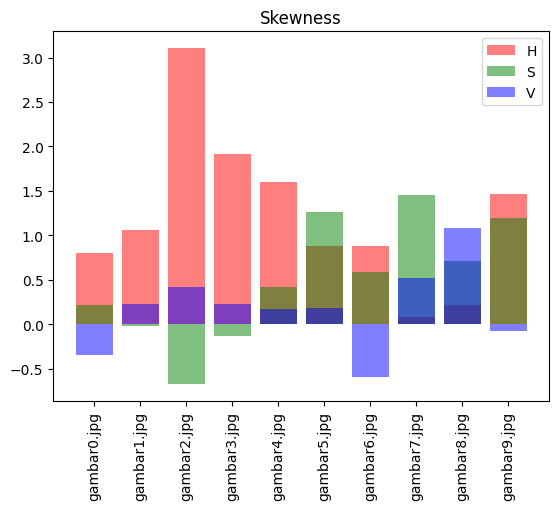

In [6]:
# Buat bar chart untuk nilai rata-rata
plt.bar(file_names, means[:,0], color='r', alpha=0.5, label='H')
plt.bar(file_names, means[:,1], color='g', alpha=0.5, label='S')
plt.bar(file_names, means[:,2], color='b', alpha=0.5, label='V')
plt.legend()
plt.title('Mean Value')
plt.xticks(rotation=90) # ubah label x secara vertikal
plt.show()

# Buat bar chart untuk nilai standar deviasi
plt.bar(file_names, stds[:,0], color='r', alpha=0.5, label='H')
plt.bar(file_names, stds[:,1], color='g', alpha=0.5, label='S')
plt.bar(file_names, stds[:,2], color='b', alpha=0.5, label='V')
plt.legend()
plt.title('Standard Deviation')
plt.xticks(rotation=90) # ubah label x secara vertikal
plt.show()

# Buat bar chart untuk nilai variansi
plt.bar(file_names, vars[:,0], color='r', alpha=0.5, label='H')
plt.bar(file_names, vars[:,1], color='g', alpha=0.5, label='S')
plt.bar(file_names, vars[:,2], color='b', alpha=0.5, label='V')
plt.legend()
plt.title('Variance')
plt.xticks(rotation=90) # ubah label x secara vertikal
plt.show()

# Buat bar chart untuk nilai modus
plt.bar(file_names, modes[:,0], color='r', alpha=0.5, label='H')
plt.bar(file_names, modes[:,1], color='g', alpha=0.5, label='S')
plt.bar(file_names, modes[:,2], color='b', alpha=0.5, label='V')
plt.legend()
plt.title('Mode')
plt.xticks(rotation=90) # ubah label x secara vertikal
plt.show()

# Buat bar chart untuk nilai skewness
plt.bar(file_names, skews[:,0], color='r', alpha=0.5, label='H')
plt.bar(file_names, skews[:,1], color='g', alpha=0.5, label='S')
plt.bar(file_names, skews[:,2], color='b', alpha=0.5, label='V')
plt.legend()
plt.title('Skewness')
plt.xticks(rotation=90) # ubah label x secara vertikal
plt.show()




# **Berdasarkan hasil perhitungan statistik yang dilakukan, dapat diambil beberapa insight atau kesimpulan sebagai berikut:**

# Insight dari Wahid :

*   Rata-rata nilai citra pada setiap channel warna tidak sama. Nilai rata-rata tertinggi terdapat pada channel G pada gambar ke-6, sedangkan nilai rata-rata terendah terdapat pada channel B pada gambar ke-5.

*  Standar deviasi nilai citra pada setiap channel warna juga tidak sama. Standar deviasi tertinggi terdapat pada channel B pada gambar ke-1, sedangkan standar deviasi terendah terdapat pada channel R pada gambar ke-5. 

*   Variansi nilai citra pada setiap channel warna tidak sama. Variansi tertinggi terdapat pada channel G pada gambar ke-6, sedangkan variansi terendah terdapat pada channel R pada gambar ke-5.

*   Modus nilai citra pada setiap channel warna juga tidak sama. Modus tertinggi terdapat pada channel R pada gambar ke-1 dan channel G pada gambar ke-2 dan ke-3, sedangkan modus terendah terdapat pada channel R pada gambar ke-6 dan channel B pada gambar ke-1.
 
*  Skewness (kecondongan) distribusi nilai citra pada setiap channel warna berbeda-beda. Terdapat beberapa channel yang memiliki distribusi nilai citra yang condong ke kiri (skewness negatif), seperti channel R pada gambar ke-3, channel G pada gambar ke-5, dan channel B pada gambar ke-2. Terdapat pula beberapa channel yang memiliki distribusi nilai citra yang condong ke kanan (skewness positif), seperti channel G pada gambar ke-1 dan channel B pada gambar ke-3. Ada juga beberapa channel yang memiliki distribusi nilai citra yang simetris (skewness mendekati nol), seperti channel R pada gambar ke-2, channel G pada gambar ke-2 dan ke-4, serta channel B pada gambar ke-4.


---

# Insight dari Hairul :

* Nilai rata-rata (mean) menunjukkan nilai rata-rata dari setiap saluran warna pada gambar. Gambar 1 memiliki nilai rata-rata saluran merah tertinggi, sedangkan Gambar 6 memiliki nilai rata-rata saluran hijau tertinggi. Gambar 5 memiliki nilai rata-rata saluran biru tertinggi.

* Standar deviasi (std) menunjukkan jumlah variasi atau penyebaran nilai warna dalam gambar. Gambar 1, 4, dan 6 memiliki nilai standar deviasi yang relatif tinggi untuk semua saluran warna, menunjukkan rentang nilai warna yang luas. Sebaliknya, Gambar 9 memiliki nilai standar deviasi yang rendah untuk semua saluran, menunjukkan rentang nilai warna yang sempit.

* Variansi menunjukkan derajat penyebaran atau distribusi nilai warna dalam gambar. Nilai variansi relatif konsisten di seluruh saluran warna untuk setiap gambar, menunjukkan bahwa penyebaran nilai warna seragam di seluruh saluran warna.

* Nilai skewness menunjukkan derajat ketidaksimetrian distribusi nilai warna dalam gambar. Gambar 1, 3, dan 9 memiliki nilai skewness positif untuk saluran merah, menunjukkan bahwa distribusi nilai warna condong ke nilai yang lebih tinggi. Gambar 2, 4, dan 7 memiliki nilai skewness positif untuk saluran hijau, menunjukkan pola skewness yang serupa untuk saluran hijau. Gambar 6 memiliki skewness negatif untuk saluran hijau. Saluran biru dari semua gambar memiliki skewness positif, menunjukkan bahwa distribusi nilai warna condong ke nilai yang lebih tinggi.

* Modus menunjukkan nilai warna yang paling sering muncul dalam setiap saluran. Nilai modus bervariasi luas di seluruh saluran dan gambar, menunjukkan bahwa setiap gambar memiliki distribusi nilai warna yang unik.



